In [1]:
import urllib.request
import pandas as pd
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sequence_and_conditional_tags(pfam_id):
    with urllib.request.urlopen(("https://www.uniprot.org/uniprot/?query=database%3A%28type%3Apfam+"+str(pfam_id)+"%29&columns=id,keyword-id,go-id,database(pfam),lineage(SUPERKINGDOM),lineage(KINGDOM),lineage(PHYLUM),lineage(CLASS),lineage(ORDER),lineage(FAMILY),lineage(SPECIES),lineage(GENUS),sequence&format=tab")) as f:
        query = f.read()
        query = str(query, 'utf-8')
    lines = query.split('\n')
    li_results = [x.split('\t') for x in lines]
    names = li_results[0]
    results = li_results[1:]
    return names, results

In [3]:
def column_expander(df, key, splitkey):
    splits = df[key].str.split(splitkey, expand=True)
    new_columns = {}
    for split in range(len(splits.loc[0])):
        nr = str(split)
        if len(nr)<2:
          nr="0"+nr
          
        new_columns[split] = str(key)+"_"+nr
    splits.rename(columns = new_columns, inplace = True)
    splits.sort_index(axis=1, inplace=True, ascending=False)
    df = pd.concat([df, splits], axis=1)
    return df

In [4]:
pfam_ids = ['pf00159', 'pf00918', 'pf03002']

df = pd.DataFrame()       

for pfam_id in pfam_ids:
    print('Getting', pfam_id,'from uniprot')
    names, results = get_sequence_and_conditional_tags(pfam_id)
    data = pd.DataFrame(results, columns=names)
    df = df.append(data)

Getting pf00159 from uniprot
Getting pf00918 from uniprot
Getting pf03002 from uniprot


In [5]:
df = df.dropna()
df.to_excel('data_raw.xls')
df

,Entry,Keyword ID,Gene ontology IDs,Cross-reference (pfam),Taxonomic lineage (SUPERKINGDOM),Taxonomic lineage (KINGDOM),Taxonomic lineage (PHYLUM),Taxonomic lineage (CLASS),Taxonomic lineage (ORDER),Taxonomic lineage (FAMILY),Taxonomic lineage (SPECIES),Taxonomic lineage (GENUS),Sequence
0,P41519,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Rodentia,Chinchillidae (chinchillas),Chinchilla chinchilla (Short-tailed chinchilla...,Chinchilla,APLEPVYPGDNATPEQMAQYAAEMRRYINMLTRPRY
1,P68010,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Perissodactyla (odd-toed ungulates),Equidae (horses),Equus przewalskii (Przewalski's horse) (Equus ...,Equus,APMEPVYPGDNATPEQMAQYAAELRRYINMLTRPRY
2,P41335,KW-0027; KW-0372; KW-0903; KW-0964; KW-1185,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,"Eulipotyphla (hedgehogs, shrews, moles and oth...",Erinaceidae (hedgehogs),Erinaceus europaeus (Western European hedgehog),Erinaceus,VPLEPVYPGDNATPEQMAHYAAELRRYINMLTRPRY
3,P06303,KW-0027; KW-0165; KW-0372; KW-0732; KW-0964; K...,GO:0001664; GO:0005179; GO:0005184; GO:0005615...,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Rodentia,Muridae,Rattus norvegicus (Rat),Rattus,MAVAYYCLSLFLLSTWVALLLQPLQGAWGAPLEPMYPGDYATHEQR...
4,P68004,KW-0027; KW-0372; KW-0597; KW-0903; KW-0964; K...,GO:0001664; GO:0005179; GO:0005184; GO:0005615...,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Carnivora,"Canidae (dog, coyote, wolf, fox)",Canis lupus (Gray wolf),Canis,YPAKPEAPGEDASPEELSRYYASLRHYLNLVTRQRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,A0A2U4AZK3,KW-1185,GO:0005179; GO:0005576,PF03002;,Eukaryota,Metazoa,Chordata,Mammalia,Artiodactyla,Delphinidae (marine dolphins),Tursiops truncatus (Atlantic bottle-nosed dolp...,Tursiops,CRHLEKAAFSERNVNHEGFRLYSTFQPKICTLAVSFSAYTGSGRNK...
865,A0A452G922,KW-0732; KW-1015; KW-1185,GO:0001664; GO:0005184; GO:0005576; GO:0007193,PF03002;,Eukaryota,Metazoa,Chordata,Mammalia,Artiodactyla,Bovidae,Capra hircus (Goat),Capra,MLPLCLLLPLLLLPLLLLPSGATTALSPEGGLAGHESGHTQEVAEI...
866,A0A0D9S8N7,KW-0732; KW-1015; KW-1185,GO:0001664; GO:0005184; GO:0005576; GO:0007193,PF03002;,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Cercopithecidae (Old World monkeys),Chlorocebus sabaeus (Green monkey) (Cercopithe...,Chlorocebus,MPLPPGLLLLLLSGATATAALPLEGSPTGPDSEHMPEAAGIRKSSL...
867,F6V6H8,KW-0732; KW-1015; KW-1185,GO:0001664; GO:0005184; GO:0005576; GO:0007193,PF03002;,Eukaryota,Metazoa,Chordata,Mammalia,Perissodactyla (odd-toed ungulates),Equidae (horses),Equus caballus (Horse),Equus,MPPPLCLLLLLLSSGAAAALPLEGSLAGHDGGHMQEVAEIKKNSLL...


In [6]:
df = pd.read_excel('data_raw.xls')
df.head()

,Unnamed: 0,Entry,Keyword ID,Gene ontology IDs,Cross-reference (pfam),Taxonomic lineage (SUPERKINGDOM),Taxonomic lineage (KINGDOM),Taxonomic lineage (PHYLUM),Taxonomic lineage (CLASS),Taxonomic lineage (ORDER),Taxonomic lineage (FAMILY),Taxonomic lineage (SPECIES),Taxonomic lineage (GENUS),Sequence
0,0,P41519,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Rodentia,Chinchillidae (chinchillas),Chinchilla chinchilla (Short-tailed chinchilla...,Chinchilla,APLEPVYPGDNATPEQMAQYAAEMRRYINMLTRPRY
1,1,P68010,KW-0027; KW-0372; KW-0903; KW-0964,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Perissodactyla (odd-toed ungulates),Equidae (horses),Equus przewalskii (Przewalski's horse) (Equus ...,Equus,APMEPVYPGDNATPEQMAQYAAELRRYINMLTRPRY
2,2,P41335,KW-0027; KW-0372; KW-0903; KW-0964; KW-1185,GO:0005179; GO:0005576,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,"Eulipotyphla (hedgehogs, shrews, moles and oth...",Erinaceidae (hedgehogs),Erinaceus europaeus (Western European hedgehog),Erinaceus,VPLEPVYPGDNATPEQMAHYAAELRRYINMLTRPRY
3,3,P06303,KW-0027; KW-0165; KW-0372; KW-0732; KW-0964; K...,GO:0001664; GO:0005179; GO:0005184; GO:0005615...,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Rodentia,Muridae,Rattus norvegicus (Rat),Rattus,MAVAYYCLSLFLLSTWVALLLQPLQGAWGAPLEPMYPGDYATHEQR...
4,4,P68004,KW-0027; KW-0372; KW-0597; KW-0903; KW-0964; K...,GO:0001664; GO:0005179; GO:0005184; GO:0005615...,PF00159;,Eukaryota,Metazoa,Chordata,Mammalia,Carnivora,"Canidae (dog, coyote, wolf, fox)",Canis lupus (Gray wolf),Canis,YPAKPEAPGEDASPEELSRYYASLRHYLNLVTRQRY


In [7]:
df.drop("Entry", axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
go_terms = df['Gene ontology IDs']
expand = {'Gene ontology IDs':"; ",
          'Keyword ID':";",
          }

for column in expand:
    df = column_expander(df, column, expand[column])
    df.drop(column, axis='columns', inplace=True)

In [9]:
tax=df.loc[:, df.columns.str.startswith('Taxonomic')]
taxcol=df.loc[:, df.columns.str.startswith('Taxonomic')].columns.tolist()

In [10]:
seq = df['Sequence']
df.drop('Sequence', axis='columns', inplace=True)

In [11]:
for col in taxcol:
  df.drop(col, inplace=True,axis=1)

In [12]:
df['Cross-reference (pfam)']=df['Cross-reference (pfam)'].str.strip(";")

In [13]:
df

,Cross-reference (pfam),Gene ontology IDs_40,Gene ontology IDs_39,Gene ontology IDs_38,Gene ontology IDs_37,Gene ontology IDs_36,Gene ontology IDs_35,Gene ontology IDs_34,Gene ontology IDs_33,Gene ontology IDs_32,...,Keyword ID_09,Keyword ID_08,Keyword ID_07,Keyword ID_06,Keyword ID_05,Keyword ID_04,Keyword ID_03,Keyword ID_02,Keyword ID_01,Keyword ID_00
0,PF00159,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,KW-0964,KW-0903,KW-0372,KW-0027
1,PF00159,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,KW-0964,KW-0903,KW-0372,KW-0027
2,PF00159,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,KW-1185,KW-0964,KW-0903,KW-0372,KW-0027
3,PF00159,None,None,None,None,None,None,None,None,None,...,None,None,None,None,KW-1185,KW-0964,KW-0732,KW-0372,KW-0165,KW-0027
4,PF00159,None,None,None,None,None,None,None,None,None,...,None,None,None,None,KW-1185,KW-0964,KW-0903,KW-0597,KW-0372,KW-0027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,PF03002,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,KW-1185
2871,PF03002,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,KW-1185,KW-1015,KW-0732
2872,PF03002,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,KW-1185,KW-1015,KW-0732
2873,PF03002,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,KW-1185,KW-1015,KW-0732


In [14]:
df = pd.concat([df, tax], axis=1)

In [15]:
df['Sequence'] = seq

In [16]:
df['Sequence lenght']  = df['Sequence'].str.len()

In [17]:
import seaborn as sns, numpy as np

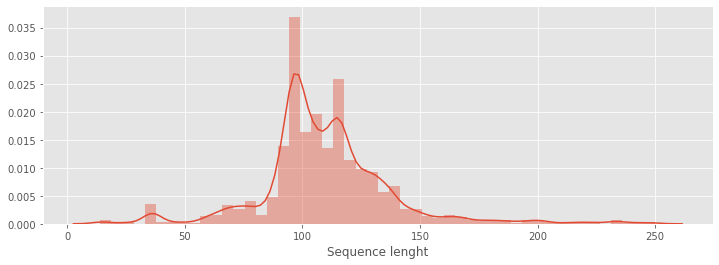

In [18]:
df.drop(df[df['Sequence lenght'] >250 ].index , inplace=True)

plt.style.use("ggplot")

plt.figure(figsize=(12,4))

sns.distplot(df['Sequence lenght'])
plt.savefig('hist.jpg', dpi=150)
plt.show()

In [19]:
df.drop(df[df['Sequence lenght'] > 120 ].index , inplace=True)
df.drop(df[df['Sequence lenght'] < 80 ].index , inplace=True)

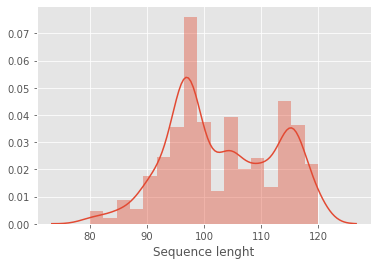

In [20]:
sns.distplot(df['Sequence lenght'])
plt.show()

In [21]:
df.drop('Sequence lenght', axis=1, inplace=True)
#df.drop('Cross-reference (pfam)', axis=1, inplace=True)
file = "dataset.csv"
df.to_csv(file, index=None)